# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

I was able to achieve over 80% accuracy - can you beat that?

Below I've set up an outline of a notebook for this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Import Data

Import data and take a quick glance

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt


input_file = "C:/_courses/sundog ds/DataScience-Python3/mammographic_masses.data.txt"
df = pd.read_csv(input_file, header = 0)

In [2]:
df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


Looking at the data it contains '?' - next reopen and convert those to NaN.

In [3]:
df = pd.read_csv(input_file, na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])

In [4]:
df.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null float64
age         956 non-null float64
shape       930 non-null float64
margin      913 non-null float64
density     885 non-null float64
severity    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [6]:
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


The missing data seems randomly distributed, so for now drop all rows with NaN (perhaps it would be better to backfill to not loose data)

In [7]:
df.dropna(inplace=True)

Extract Features (age, shape, margin, density) and predictor (severity)

In [8]:
# set features
X = df[['age', 'shape', 'margin', 'density']].copy()

# predictor
y = df['severity']

Plot the scatter matrix of features

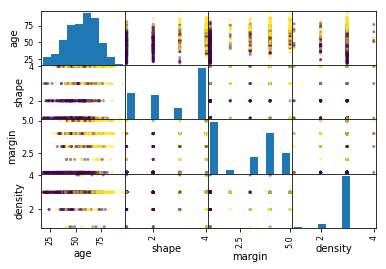

In [9]:
pd.plotting.scatter_matrix(X, c=y)
plt.show()

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

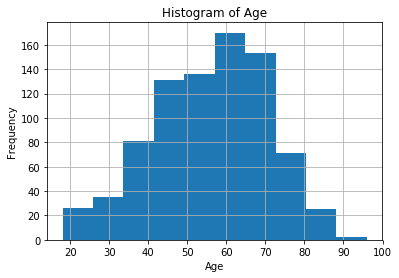

In [10]:
df['age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

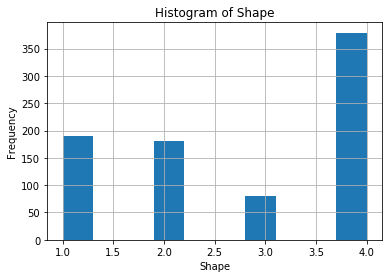

In [14]:
df['shape'].hist()
plt.title('Histogram of Shape')
plt.xlabel('Shape')
plt.ylabel('Frequency')
plt.show()

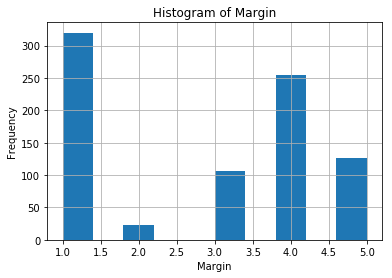

In [15]:
df['margin'].hist()
plt.title('Histogram of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

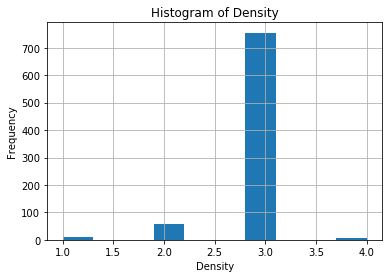

In [16]:
df['density'].hist()
plt.title('Histogram of Density')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

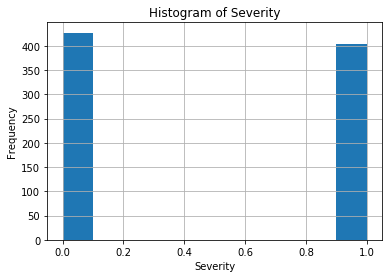

In [17]:
df['severity'].hist()
plt.title('Histogram of Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

# Normalize the data

In [12]:
from sklearn import preprocessing

# normalize the data
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)

## Create training and test sets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = .25, random_state=42)

## Decision Trees

Create a Decision Tree Classifier and fit to the training data

In [21]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Get Predictions

In [23]:
# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

Generate the confusion matrix and classification report

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Decision Tree confusion matrix\n\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree confusion matrix

 [[81 25]
 [12 90]]
             precision    recall  f1-score   support

          0       0.87      0.76      0.81       106
          1       0.78      0.88      0.83       102

avg / total       0.83      0.82      0.82       208



Display the resulting decision tree.

In [75]:
# too big for github!
#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn import tree
#from pydotplus import graph_from_dot_data 

# jupyter notebook version
#dot_data = StringIO()  
#tree.export_graphviz(clf, 
#                     out_file=dot_data,  
#                     filled=True, rounded=True, special_characters=True, 
#                     feature_names=feature_names)    
#Image(graph.create_png())  

Optional: save tree to local hard-drive

In [29]:
# save tree to local hd

import pydot

dotfile = open("tree.dot", 'w')
tree.export_graphviz(clf, 
                     out_file = dotfile, 
                     filled=True, rounded=True, special_characters=True, 
                     feature_names = feature_names)
dotfile.close()

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Measure the accuracy of the resulting decision tree model using your test data.

In [32]:
clf.score(X_test, y_test)

0.76923076923076927

Use K-Fold Cross Validation to get a better measure of the model's accuracy

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print('Decision Tree Cross Validation score: ', '{:.2%}'.format(scores.mean()))

[ 0.73809524  0.71428571  0.79761905  0.78313253  0.79518072  0.71084337
  0.71084337  0.73170732  0.8902439   0.73170732]
Decision Tree Cross Validation score:  76.04%


Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# cross val score...
scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print('Random Forest Cross Validation score: ', '{:.2%}'.format(scores.mean()))

[[82 24]
 [16 86]]
             precision    recall  f1-score   support

          0       0.84      0.77      0.80       106
          1       0.78      0.84      0.81       102

avg / total       0.81      0.81      0.81       208

[ 0.71428571  0.72619048  0.83333333  0.74698795  0.8313253   0.6746988
  0.73493976  0.76829268  0.75609756  0.70731707]
Random Forest Cross Validation score:  0.749346864811


# Hyperparameter Tuning Random Forest
Optimize the Random Forest by tuning all the parameters and testing the best model

In [55]:
from pprint import pprint

print('Current Parameters:')
pprint(clf.get_params())

Current Parameters:
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [41]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# min number of samples required to split a node
min_samples_split = [2, 5, 10]

# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]

In [42]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


### RandomizedSearchCV

Use RandomizedSearchCV along with the random_grid parameters to do a random search of parameters using 3 fold cross validation, while searching across 100 different combinations

In [74]:
from sklearn.model_selection import RandomizedSearchCV

# random search of parameters...
clf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1)

# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

### Print the best parameters

In [44]:
print(clf_random.best_params_)

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


### Reclassify with best parameters

In [49]:
clf = RandomForestClassifier(n_estimators= 800, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=50, bootstrap= True)
clf = clf.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print('Random Forest after parameter tuning: ', '{:.2%}'.format(scores.mean()))

[ 0.78571429  0.79761905  0.88095238  0.77108434  0.86746988  0.73493976
  0.84337349  0.79268293  0.87804878  0.74390244]
Random Forest after parameter tuning:  0.809578733051


Results are better: 81% vs 75%

# Random Forest Feature Importance

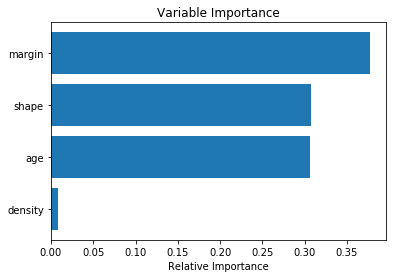

In [51]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

features = X.columns

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

## SVM

In [52]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_train,y_train)

# predict...
y_pred = svc.predict(X_test)

# cross val score...
scores = cross_val_score(svc, X, y, cv=10)

print(scores)
print('SVM score: ', '{:.2%}'.format(scores.mean()))

[ 0.71428571  0.77380952  0.86904762  0.80722892  0.84337349  0.71084337
  0.80722892  0.80487805  0.90243902  0.74390244]
SVM score:  0.797703706813


### Hyperparameter Tuning SVM

In [56]:
print('Current Parameters:')
pprint(svc.get_params())

Current Parameters:
{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [57]:
# setup parameters
parameters = {
    'C':            np.arange( 1, 10+1, 1 ).tolist(),
    'kernel':       ['linear', 'rbf', 'poly', 'sigmoid'],                  # precomputed,'poly', 'sigmoid'
    'degree':       np.arange( 0, 10+0, 1 ).tolist(),    
    'gamma':        np.arange( 0.0, 1.0+0.0, 0.1 ).tolist(),               # np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
    'coef0':        np.arange( 0.0, 1.0+0.0, 0.1 ).tolist(),               # np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(), 
    'shrinking':    [True],
    'probability':  [False],
    'tol':          np.arange( 0.001, 0.01+0.001, 0.001 ).tolist(),
    'cache_size':   [2000],
    #'class_weight': [None],
    #'verbose':      [False],
    'max_iter':     [-1],    
}

# TODO - setup to run in parellel 
model = RandomizedSearchCV(n_iter = 100,
                          estimator = svm.SVC(),
                          param_distributions = parameters,
                          n_jobs = -1,
                          iid = True,
                          refit = True,
                          cv = 5,
                          verbose = 2,
                          random_state = 42)

# fit
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.0s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'gamma': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9], 'coef0': [0.0, 0.1, 0.2, 0.30000000000000004..., 0.007, 0.008, 0.009000000000000001, 0.010000000000000002], 'cache_size': [2000], 'max_iter': [-1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [58]:
print('SVM Best Score: ', '{:.2%}'.format(model.best_score_))
print('SVM Best Estimator:')
print( model.best_estimator_)
print('SVM Best Model Parameters:')
print( model.best_params_)

SVM Best Score:  79.90%
SVM Best Estimator:
SVC(C=1, cache_size=2000, class_weight=None, coef0=0.9,
  decision_function_shape='ovr', degree=2, gamma=0.6000000000000001,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.006, verbose=False)
SVM Best Model Parameters:
{'tol': 0.006, 'shrinking': True, 'probability': False, 'max_iter': -1, 'kernel': 'poly', 'gamma': 0.6000000000000001, 'degree': 2, 'coef0': 0.9, 'cache_size': 2000, 'C': 1}


## KNN

In [62]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train, y_train, cv=10)

print(scores)
print('KNN Score:', '{:.2%}'.format(scores.mean()))


[ 0.703125    0.82258065  0.80645161  0.69354839  0.77419355  0.77419355
  0.74193548  0.80645161  0.74193548  0.77419355]
KNN Score: 0.763860887097


### KNN test with other values of K

In [64]:
for n in range(1, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    print('KNN Score:', '{:.2%}'.format(scores.mean()))

KNN Score: 0.712449596774
KNN Score: 0.683518145161
KNN Score: 0.728578629032
KNN Score: 0.715675403226
KNN Score: 0.767288306452
KNN Score: 0.747782258065
KNN Score: 0.765524193548
KNN Score: 0.752570564516
KNN Score: 0.775100806452
KNN Score: 0.763860887097
KNN Score: 0.776663306452
KNN Score: 0.768649193548
KNN Score: 0.778276209677
KNN Score: 0.778276209677
KNN Score: 0.791078629032
KNN Score: 0.784727822581
KNN Score: 0.781502016129
KNN Score: 0.781602822581
KNN Score: 0.784778225806
KNN Score: 0.786391129032
KNN Score: 0.786391129032
KNN Score: 0.781502016129
KNN Score: 0.784677419355
KNN Score: 0.781502016129
KNN Score: 0.781502016129
KNN Score: 0.784727822581
KNN Score: 0.781502016129
KNN Score: 0.783114919355
KNN Score: 0.779939516129
KNN Score: 0.779939516129
KNN Score: 0.783165322581
KNN Score: 0.781552419355
KNN Score: 0.781552419355
KNN Score: 0.781552419355
KNN Score: 0.781502016129
KNN Score: 0.781502016129
KNN Score: 0.783064516129
KNN Score: 0.781451612903
KNN Score: 0

## Naive Bayes

Use MinMaxScaler to get the features in the range MultinomialNB requires.

In [65]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(X_train)

clf = MultinomialNB()

scores = cross_val_score(clf, all_features_minmax, y_train, cv=10)
print(scores)
print('Naive Bayes Score:', '{:.2%}'.format(scores.mean()))

[ 0.71875     0.77419355  0.75806452  0.72580645  0.82258065  0.80645161
  0.79032258  0.75806452  0.74193548  0.82258065]
Naive Bayes Score: 0.771875


## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

scores = cross_val_score(regressor, X, y, cv=10)

print(scores)
print('Logistic Regression Score:', '{:.2%}'.format(scores.mean()))

[ 0.70238095  0.75        0.9047619   0.81927711  0.8313253   0.71084337
  0.77108434  0.80487805  0.90243902  0.76829268]
Logistic Regression Score: 0.796528273372


## Neural Networks

In [68]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.layers import Dense
from keras.models import Sequential

In [69]:
def create_model():
    model = Sequential()
    
    # 6-unit layer...
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    
    # atempt to add an additional layer (doesn't help)
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    
    # output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model - rmsprop seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model


from keras.wrappers.scikit_learn import KerasClassifier

# estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, nb_epoch=100, verbose=0)

# use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, X_train, y_train, cv=10)
cv_scores.mean()

0.5513824894429169

Deep learning conclusion - not near enough data!

## And the winner?

Logistic Regression for simplicity!  Random Forest ultimately performed better, but wow Logistic Resgression is easy to understand and performs very well here.